In [1]:
import pandas as pd
import numpy as np
import arxiv
import os
import networkx as nx
import itertools

In [2]:
client=arxiv.Client()

In [3]:
search = arxiv.Search(
  query = "misinformation",
  max_results = 10000,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

In [4]:
results=client.results(search)

In [5]:
all_results = list(results)

In [6]:
all_results[0]

arxiv.Result(entry_id='http://arxiv.org/abs/2410.19517v1', updated=datetime.datetime(2024, 10, 25, 12, 42, 7, tzinfo=datetime.timezone.utc), published=datetime.datetime(2024, 10, 25, 12, 42, 7, tzinfo=datetime.timezone.utc), title='Detection of Human and Machine-Authored Fake News in Urdu', authors=[arxiv.Result.Author('Muhammad Zain Ali'), arxiv.Result.Author('Yuxia Wang'), arxiv.Result.Author('Bernhard Pfahringer'), arxiv.Result.Author('Tony Smith')], summary='The rise of social media has amplified the spread of fake news, now further\ncomplicated by large language models (LLMs) like ChatGPT, which ease the\ngeneration of highly convincing, error-free misinformation, making it\nincreasingly challenging for the public to discern truth from falsehood.\nTraditional fake news detection methods relying on linguistic cues also becomes\nless effective. Moreover, current detectors primarily focus on binary\nclassification and English texts, often overlooking the distinction between\nmachine-

In [7]:
authorship=[]
for authors in all_results:
    author_list=[]
    for i in authors.authors:
        author_list.append(i.name)
    authorship.append(author_list)

In [8]:
authorship[0]

['Muhammad Zain Ali', 'Yuxia Wang', 'Bernhard Pfahringer', 'Tony Smith']

In [9]:
G=nx.Graph()

In [10]:
edges=[]
for val in authorship:
    edges.extend(list(itertools.combinations(val, 2)))

In [11]:
G.add_edges_from(edges)

In [12]:
len(list(G.nodes))

4793

In [13]:
sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[:5]

[('Preslav Nakov', 0.020242070116861435),
 ('Iason Gabriel', 0.014398998330550918),
 ('Lisa Anne Hendricks', 0.014398998330550918),
 ('Sasha Brown', 0.014398998330550918),
 ('Conor Griffin', 0.014398998330550918)]

In [14]:
average_degree_centrality = np.mean(list(nx.degree_centrality(G).values()))

In [15]:
nodes_to_remove = [node for node, centrality in nx.degree_centrality(G).items() if centrality < average_degree_centrality]
G.remove_nodes_from(nodes_to_remove)

In [16]:
len(list(G.nodes()))

1385

In [17]:
pos=nx.kamada_kawai_layout(G)

{'Preslav Nakov': Text(0.1804738267520688, -0.20902268282505157, 'Preslav Nakov'),
 'Iason Gabriel': Text(-0.06413792697160345, 0.019500887031953386, 'Iason Gabriel'),
 'Lisa Anne Hendricks': Text(-0.04171349553474162, 0.03019168408764049, 'Lisa Anne Hendricks'),
 'Sasha Brown': Text(-0.048769684611775964, 0.01872213030673688, 'Sasha Brown'),
 'Conor Griffin': Text(-0.07273637764497952, 0.026525148651575813, 'Conor Griffin')}

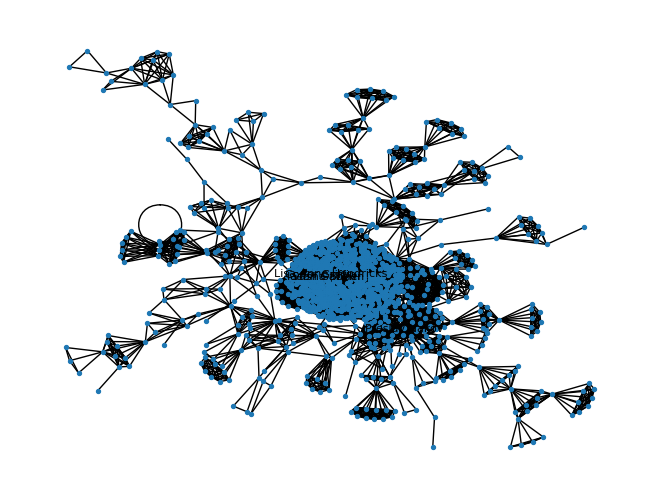

In [18]:
nx.draw(G, pos=pos, node_size=8)
top_5_centrality = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
labels = {node: node for node, _ in top_5_centrality}
nx.draw_networkx_labels(G, pos, labels, font_size=8)